In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d phylake1337/fire-dataset

Dataset URL: https://www.kaggle.com/datasets/phylake1337/fire-dataset
License(s): CC0-1.0
 99% 385M/387M [00:19<00:00, 23.6MB/s]
100% 387M/387M [00:19<00:00, 20.4MB/s]


In [ ]:
## unzip files in colab
import zipfile
zip_ref = zipfile.ZipFile('/content/fire-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
os.listdir("/content/fire_dataset")

['non_fire_images', 'fire_images']

In [ ]:
x=len(os.listdir("/content/fire_dataset/fire_images"))
y=len(os.listdir("/content/fire_dataset/non_fire_images"))
print("Number of fire images :",x)
print("Number of non_fire images :",y)

Number of fire images : 755
Number of non_fire images : 244


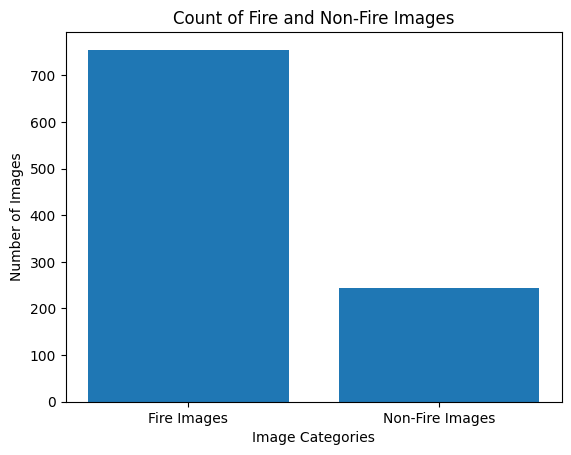

In [ ]:
# Define the labels and values for the bar chart
labels = ["Fire Images", "Non-Fire Images"]
values = [x, y]

# Plot the bar chart
plt.bar(labels, values)

# Add labels and title to the chart
plt.xlabel("Image Categories")
plt.ylabel("Number of Images")
plt.title("Count of Fire and Non-Fire Images")

# Display the chart
plt.show()

In [ ]:
## data is very imbalance

In [ ]:
import os
import random
import shutil

# Get the number of files in the fire_images directory
fire_images_count = len(os.listdir("/content/fire_dataset/fire_images"))

# Get the number of files in the non_fire_images directory
non_fire_images_count = len(os.listdir("/content/fire_dataset/non_fire_images"))

# Calculate 20% of the number of fire_images and non_fire_images
test_fire_images_count = int(0.2 * fire_images_count)
test_non_fire_images_count = int(0.2 * non_fire_images_count)

# Create test folders for fire_images and non_fire_images
os.makedirs("/content/test_images/fire_images", exist_ok=True)
os.makedirs("/content/test_images/non_fire_images", exist_ok=True)


# Select random files and move them to the test folders
selected_fire_images = random.sample(os.listdir("/content/fire_dataset/fire_images"), test_fire_images_count)
selected_non_fire_images = random.sample(os.listdir("/content/fire_dataset/non_fire_images"), test_non_fire_images_count)

for file in selected_fire_images:
    src = "/content/fire_dataset/fire_images/" + file
    dest = "/content/test_images/fire_images/" + file
    shutil.move(src, dest)

for file in selected_non_fire_images:
    src = "/content/fire_dataset/non_fire_images/" + file
    dest = "/content/test_images/non_fire_images/" + file
    shutil.move(src, dest)

print("Moved", test_fire_images_count, "fire images and", test_non_fire_images_count, "non-fire images to the test folders.")



Moved 151 fire images and 48 non-fire images to the test folders.


In [ ]:
x=len(os.listdir("/content/fire_dataset/fire_images"))
y=len(os.listdir("/content/fire_dataset/non_fire_images"))
print("Number of fire images :",x)
print("Number of non_fire images :",y)

Number of fire images : 604
Number of non_fire images : 196


In [ ]:
def plot_images_from_directory(directory_path, classes, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {classes}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

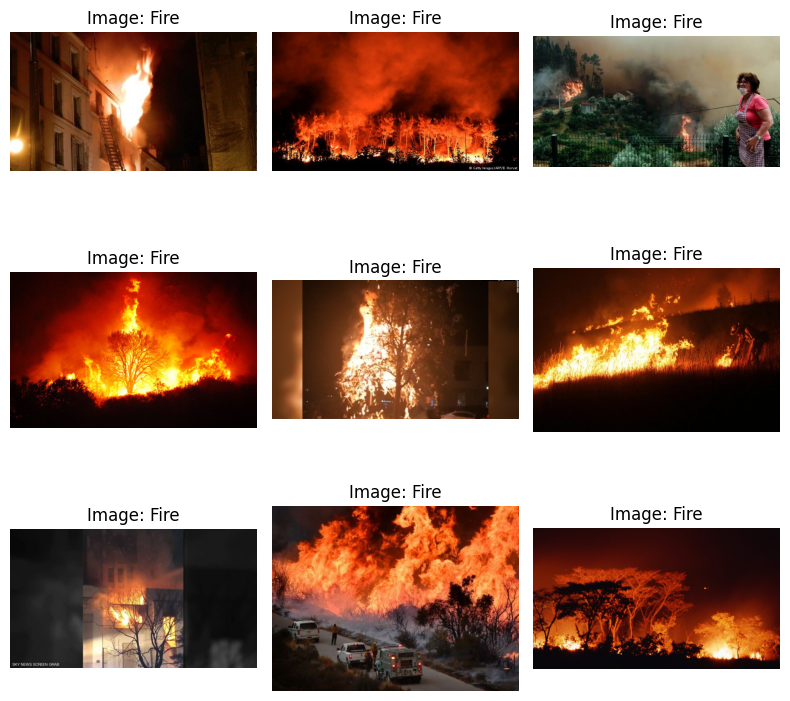

In [ ]:
dir1="/content/fire_dataset/fire_images"
plot_images_from_directory(dir1,"Fire")

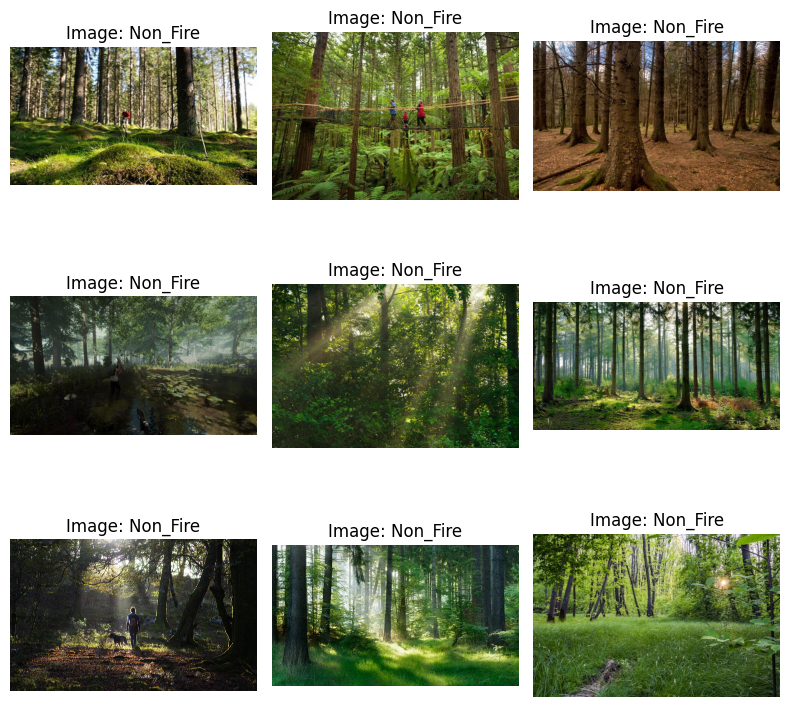

In [ ]:
dir2="/content/fire_dataset/non_fire_images"
plot_images_from_directory(dir2,"Non_Fire")

In [ ]:
 # Using 20% of data for validation
base_dir="/content/fire_dataset"
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # Set as validation data

Found 641 images belonging to 2 classes.
Found 159 images belonging to 2 classes.


In [ ]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

Training class labels: {'fire_images': 0, 'non_fire_images': 1}
Validation class labels: {'fire_images': 0, 'non_fire_images': 1}


In [ ]:
images, labels = next(train_generator)
images, labels


(array([[[[0.2784314 , 0.32941177, 0.11764707],
          [0.3921569 , 0.46274513, 0.25882354],
          [0.07843138, 0.17254902, 0.        ],
          ...,
          [0.5176471 , 0.57254905, 0.33333334],
          [0.18039216, 0.3372549 , 0.10196079],
          [0.33333334, 0.38431376, 0.20392159]],
 
         [[0.16470589, 0.25490198, 0.04313726],
          [0.37647063, 0.4156863 , 0.21960786],
          [0.3803922 , 0.41960788, 0.18039216],
          ...,
          [0.09803922, 0.25490198, 0.0509804 ],
          [0.2627451 , 0.3803922 , 0.12941177],
          [0.23529413, 0.33333334, 0.11764707]],
 
         [[0.21176472, 0.28627452, 0.10980393],
          [0.27058825, 0.36078432, 0.14901961],
          [0.23529413, 0.24705884, 0.07843138],
          ...,
          [0.15294118, 0.30980393, 0.10588236],
          [0.13333334, 0.33333334, 0.1137255 ],
          [0.23529413, 0.33333334, 0.10588236]],
 
         ...,
 
         [[0.20000002, 0.42352945, 0.5411765 ],
          [0.16862

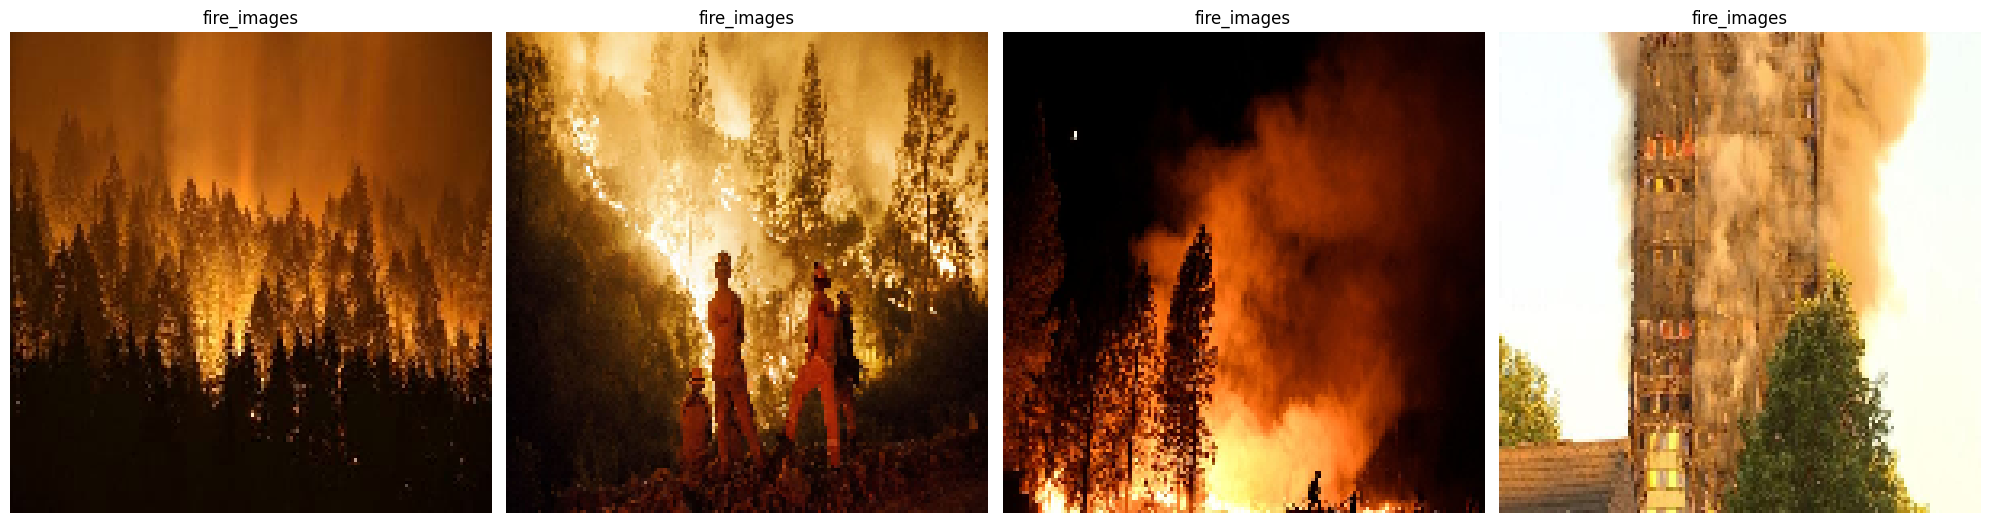

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [ ]:
train_generator.reset()


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

33.0 8.0


In [ ]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=33,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=8)

Epoch 1/10
33/33 [==============================] - ETA: 0s - loss: 0.4255 - accuracy: 0.7816

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/content/test_images'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data

Found 199 images belonging to 2 classes.


In [ ]:
np.ceil(test_generator.samples/test_generator.batch_size)

10.0

In [ ]:
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))
probabilities